<a href="https://colab.research.google.com/github/VitalyGladyshev/gb_nlp/blob/main/HW_07_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ 07 NLP

## Задание 1

Переделать генерацию текста по символам в генерацию по словам

In [ ]:
import numpy as np
import tensorflow as tf
import string
from tqdm import tqdm
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [27]:
%cd "./gdrive/My Drive/Colab Notebooks/NLP/"

/content/gdrive/My Drive/Colab Notebooks/NLP


In [28]:
path_to_file = 'evgenyi_onegin.txt'

# text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# # length of text is the number of characters in it
# print('Length of text: {} characters'.format(len(text)))

vocab = set()
vocab.add("\n")
vocab.add(".")
vocab.add(",")
with open(path_to_file, "r", encoding='utf-8', errors='ignore') as f:
    for line in tqdm(f):
        line = ''.join([ch for ch in list(line) if ch not in string.punctuation])
        words = line.lower().strip().split(" ")
        for word in words:
            vocab.add(word)

6505it [00:00, 16069.17it/s]


In [29]:
"\n" in vocab

True

In [30]:
word2vec = {}
idx2word = np.array(list(vocab))

for i, word in enumerate(vocab):
    word2vec[word] = i

In [31]:
word2vec["\n"], word2vec["."], idx2word[word2vec["."]]

(4201, 3898, '.')

In [32]:
text_as_int = []
with open(path_to_file, "r", encoding='utf-8', errors='ignore') as f:
    for line in tqdm(f):
        words = line.lower().strip().split(" ")
        for word in words:
            point, comma = False, False
            if "," in word:
                comma = True
            if "." in word:
                point = True
            word = ''.join([ch for ch in list(word) if ch not in string.punctuation])
            text_as_int.append(word2vec[word])
            if comma:
                text_as_int.append(word2vec[","])
            if point:
                text_as_int.append(word2vec["."])
        text_as_int.append(word2vec["\n"])

6505it [00:00, 121306.74it/s]


In [33]:
text_as_int[:15]

[4231,
 4177,
 7696,
 4201,
 0,
 4201,
 368,
 3632,
 4201,
 1695,
 7692,
 3685,
 4201,
 0,
 4201]

In [34]:
len(text_as_int)

35895

### train and target

In [35]:
# The maximum length sentence you want for a single input in characters
seq_length = 100
examples_per_epoch = len(text_as_int)//(seq_length+1)

# Create training examples / targets
word_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for i in word_dataset.take(25):
    print(idx2word[i.numpy()])

александр
сергеевич
пушкин





евгений
онегин


роман
в
стихах





не
мысля
гордый
свет
забавить
,


вниманье
дружбы
возлюбя


In [36]:
sequences = word_dataset.batch(seq_length+1, drop_remainder=True)
sequences

<BatchDataset shapes: (101,), types: tf.int32>

In [37]:
for item in sequences.take(3):
    # print(idx2word[item.numpy().astype(int)])
    print(' '.join(idx2word[item.numpy()]))

александр сергеевич пушкин 
  
 евгений онегин 
 роман в стихах 
  
 не мысля гордый свет забавить , 
 вниманье дружбы возлюбя , 
 хотел бы я тебе представить 
 залог достойнее тебя , 
 достойнее души прекрасной , 
 святой исполненной мечты , 
 поэзии живой и ясной , 
 высоких дум и простоты 
 но так и быть  рукой пристрастной 
 прими собранье пестрых глав , 
 полусмешных , полупечальных , 
 простонародных , идеальных , 
 небрежный плод моих забав , 
 бессонниц , легких вдохновений , 
 незрелых и увядших лет , 

ума холодных наблюдений 
 и сердца горестных замет . 
  
 глава первая 
  
 и жить торопится и чувствовать спешит . 
 кн . вяземский . 
  
 i 
  
 мой дядя самых честных правил , 
 когда не в шутку занемог , 
 он уважать себя заставил 
 и лучше выдумать не мог . 
 его пример другим наука 
 но , боже мой , какая скука 
 с больным сидеть и день и ночь , 
 не отходя ни шагу прочь 
 какое низкое коварство 
 полуживого забавлять , 
 ему подушки поправлять
, 
 печально подносить лека

In [38]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

In [39]:
for input_example, target_example in  dataset.take(1):
    print('Input data: ', repr(' '.join(idx2word[input_example.numpy()])))
    print('Target data:', repr(' '.join(idx2word[target_example.numpy()])))

Input data:  'александр сергеевич пушкин \n  \n евгений онегин \n роман в стихах \n  \n не мысля гордый свет забавить , \n вниманье дружбы возлюбя , \n хотел бы я тебе представить \n залог достойнее тебя , \n достойнее души прекрасной , \n святой исполненной мечты , \n поэзии живой и ясной , \n высоких дум и простоты \n но так и быть  рукой пристрастной \n прими собранье пестрых глав , \n полусмешных , полупечальных , \n простонародных , идеальных , \n небрежный плод моих забав , \n бессонниц , легких вдохновений , \n незрелых и увядших лет ,'
Target data: 'сергеевич пушкин \n  \n евгений онегин \n роман в стихах \n  \n не мысля гордый свет забавить , \n вниманье дружбы возлюбя , \n хотел бы я тебе представить \n залог достойнее тебя , \n достойнее души прекрасной , \n святой исполненной мечты , \n поэзии живой и ясной , \n высоких дум и простоты \n но так и быть  рукой пристрастной \n прими собранье пестрых глав , \n полусмешных , полупечальных , \n простонародных , идеальных , \n неб

In [40]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset shapes: ((64, 100), (64, 100)), types: (tf.int32, tf.int32)>

In [ ]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [ ]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim,
                                  batch_input_shape=[batch_size, None]),
        tf.keras.layers.LSTM(rnn_units,   # tf.keras.layers.GRU(rnn_units,
                            return_sequences=True,
                            stateful=True,
                            recurrent_initializer='glorot_uniform'),
        tf.keras.layers.Dense(vocab_size)
    ])
    return model

In [ ]:
model = build_model(
            vocab_size=len(vocab),
            embedding_dim=embedding_dim,
            rnn_units=rnn_units,
            batch_size=BATCH_SIZE)

In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 8566) # (batch_size, sequence_length, vocab_size)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (64, None, 256)           2192896   
_________________________________________________________________
gru (GRU)                    (64, None, 1024)          3938304   
_________________________________________________________________
dense (Dense)                (64, None, 8566)          8780150   
Total params: 14,911,350
Trainable params: 14,911,350
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()

In [ ]:
print("Input: \n", repr(" ".join(idx2word[input_example_batch[0]])))
print()
print("Next Char Predictions: \n", repr(" ".join(idx2word[sampled_indices ])))

Input: 
 'то воля неба я твоя \n вся жизнь моя была залогом \n свиданья верного с тобой \n я знаю , ты мне послан богом , \n до гроба ты хранитель мой . \n ты в сновиденьях мне являлся \n незримый , ты мне был уж мил , \n твой чудный взгляд меня томил , \n в душе твой голос раздавался \n давно . нет , это был не сон \n ты чуть вошел , я вмиг узнала , \n вся обомлела , запылала \n и в мыслях молвила вот он \n не правда ль я тебя слыхала \n ты говорил'

Next Char Predictions: 
 'непонятна печальным забор трубок тетки взбесить маню приехал наши возьми ces послан целовать целя обморок закону медалью прихотливый чуждо общественное рисуя сегодня певец тряслися воротник моим свесть охоты днем олигархических восторгов семьей найдено погрузился сие исполнены беспокоилась утренний способен демоном харитонья волшебному тишине звон уходит невольник усердие езда пустяков писать клоками предузнав модный утреннем видит non румянец невинность чуть эклога слабый хвалить дурака значенье изменять восторж

## Train the model

In [ ]:
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

example_batch_loss = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (64, 100, 8566)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       9.055292


In [ ]:
model.compile(optimizer='adam', loss=loss)

### Configure checkpoints

In [ ]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

### Execute the training

In [ ]:
EPOCHS = 100

In [ ]:
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/200
5/5 [==============================] - 1s 277ms/step - loss: 8.9231
Epoch 2/200
5/5 [==============================] - 2s 352ms/step - loss: 6.4932
Epoch 3/200
5/5 [==============================] - 1s 248ms/step - loss: 6.2706
Epoch 4/200
5/5 [==============================] - 1s 263ms/step - loss: 6.1984
Epoch 5/200
5/5 [==============================] - 1s 276ms/step - loss: 6.1515
Epoch 6/200
5/5 [==============================] - 1s 291ms/step - loss: 6.1051
Epoch 7/200
5/5 [==============================] - 1s 245ms/step - loss: 6.0675
Epoch 8/200
5/5 [==============================] - 1s 260ms/step - loss: 5.9805
Epoch 9/200
5/5 [==============================] - 3s 519ms/step - loss: 5.9293
Epoch 10/200
5/5 [==============================] - 1s 255ms/step - loss: 5.8399
Epoch 11/200
5/5 [==============================] - 1s 255ms/step - loss: 5.7459
Epoch 12/200
5/5 [==============================] - 10s 2s/step - loss: 5.6339
Epoch 13/200
5/5 [=====================

## Generate text

In [ ]:
tf.train.latest_checkpoint(checkpoint_dir)

'./training_checkpoints/ckpt_200'

In [ ]:
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([1, None]))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (1, None, 256)            2192896   
_________________________________________________________________
gru_1 (GRU)                  (1, None, 1024)           3938304   
_________________________________________________________________
dense_1 (Dense)              (1, None, 8566)           8780150   
Total params: 14,911,350
Trainable params: 14,911,350
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def generate_text(model, start_string):
    # Evaluation step (generating text using the learned model)

    # Number of characters to generate
    num_generate = 500

    # Converting our start string to numbers (vectorizing)
    input_eval = []

    words = start_string.lower().strip().split(" ")
    for word in words:
        point, comma = False, False
        if "," in word:
            comma = True
        if "." in word:
            point = True
        word = ''.join([ch for ch in list(word) if ch not in string.punctuation])
        input_eval.append(word2vec[word])
        if comma:
            input_eval.append(word2vec[","])
        if point:
            input_eval.append(word2vec["."])
    # input_eval = [word2vec[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    # Empty string to store our results
    text_generated = []

    # Low temperature results in more predictable text.
    # Higher temperature results in more surprising text.
    # Experiment to find the best setting.
    temperature = 0.5

    # Here batch size == 1
    model.reset_states()
    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        # using a categorical distribution to predict the character returned by the model
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()

        # Pass the predicted character as the next input to the model
        # along with the previous hidden state
        input_eval = tf.expand_dims([predicted_id], 0)

        # print(predicted_id)
        
        text_generated.append(idx2word[predicted_id])

    return (start_string + ' '.join(text_generated))

In [ ]:
start_string = u"Уж небо осенью дышало, \n Уж реже солнышко блистало, \n Короче становился день,"

print(generate_text(model, start_string=start_string))

Уж небо осенью дышало, 
 Уж реже солнышко блистало, 
 Короче становился день,последней конце конце плечу глухой удовольствием почте удовольствием мере плечу моде цели барами дремлющей последней плечу плечу мере хвостиком огонь огонь моде удовольствием шумящею конце конце плечу удовольствием моде моде плечу плечу последней брегам куклою суд плечу плечу последней плечу мере вечности плечу ручью родственным плечу плечу залу брусничною точностью косу колено работам брусничною плечу последней мере плечу плечу плечу барами плечу плечу брусничною удовольствием последней моде моде трепетом восточной домом плечу почте удовольствием видом удовольствием начала солнцем моде плечу плечу шумящею шумящею конце скату плечу холма последней колено плечу последней плечу левой конце последней конце удовольствием крайний ученым последней почте шумящею конце зимнем скату шумящею плечу окном удовольствием моде почте плечу прелестного плечу зале глазах плечу плечу почте конце моде плечу шумном плечу плечу пет

## Задание 2

Запустить seq2seq, seq2seq с внимаием для перевода русских слов + описать наблюдения по качеству

## Посимвольно

In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense

In [ ]:
batch_size = 128
epochs = 100
latent_dim = 256
num_samples = 20000
data_path = '/content/gdrive/My Drive/Colab Notebooks/NLP/data/rus-eng/rus.txt'

In [ ]:
# Собираем из текстов токены и делаем one-hot вектора на каждый токен

input_texts = []
target_texts = []
input_characters = set()
target_characters = set()

with open(data_path, 'r', encoding='utf-8') as f:
    lines = f.read().split('\n')
    
for line in lines[: min(num_samples, len(lines) - 1)]:
    input_text, target_text, _ = line.split('\t')
    target_text = '\t' + target_text + '\n'
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

In [ ]:
input_token_index = dict(
    [(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict(
    [(char, i) for i, char in enumerate(target_characters)])

In [ ]:
encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')

In [ ]:
for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.
    encoder_input_data[i, t + 1:, input_token_index[' ']] = 1.
    for t, char in enumerate(target_text):
        decoder_input_data[i, t, target_token_index[char]] = 1.
        if t > 0:
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.
    decoder_input_data[i, t + 1:, target_token_index[' ']] = 1.
    decoder_target_data[i, t:, target_token_index[' ']] = 1.

In [21]:
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)

encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

reverse_input_char_index = dict(
    (i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict(
    (i, char) for char, i in target_token_index.items())

Epoch 1/100
125/125 [==============================] - 3s 23ms/step - loss: 1.2070 - accuracy: 0.7582 - val_loss: 0.9716 - val_accuracy: 0.7333
Epoch 2/100
125/125 [==============================] - 2s 17ms/step - loss: 0.7873 - accuracy: 0.7878 - val_loss: 0.8220 - val_accuracy: 0.7868
Epoch 3/100
125/125 [==============================] - 2s 18ms/step - loss: 0.6677 - accuracy: 0.8209 - val_loss: 0.7089 - val_accuracy: 0.8041
Epoch 4/100
125/125 [==============================] - 2s 18ms/step - loss: 0.5941 - accuracy: 0.8332 - val_loss: 0.6535 - val_accuracy: 0.8149
Epoch 5/100
125/125 [==============================] - 2s 18ms/step - loss: 0.5895 - accuracy: 0.8349 - val_loss: 0.6300 - val_accuracy: 0.8214
Epoch 6/100
125/125 [==============================] - 2s 17ms/step - loss: 0.5411 - accuracy: 0.8449 - val_loss: 0.6043 - val_accuracy: 0.8256
Epoch 7/100
125/125 [==============================] - 2s 17ms/step - loss: 0.5197 - accuracy: 0.8496 - val_loss: 0.5876 - val_accuracy:

In [22]:
def decode_sequence(input_seq):
    states_value = encoder_model.predict(input_seq)

    target_seq = np.zeros((1, 1, num_decoder_tokens))
    target_seq[0, 0, target_token_index['\t']] = 1.

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        states_value = [h, c]

    return decoded_sentence

In [26]:
for seq_index in range(0, 20000, 500):
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print('-')
    print('Input sentence:', input_texts[seq_index])
    print('Decoded sentence:', decoded_sentence)

-
Input sentence: Go.
Decoded sentence: Идите.

-
Input sentence: Have fun.
Decoded sentence: Наслаждайтесь.

-
Input sentence: He smiled.
Decoded sentence: Он улыбнулся.

-
Input sentence: Let us in.
Decoded sentence: Впустите нас.

-
Input sentence: Eat slowly.
Decoded sentence: Ешьте не спеша.

-
Input sentence: I'm stable.
Decoded sentence: Я твердый.

-
Input sentence: Tom's well.
Decoded sentence: Том в порядке.

-
Input sentence: He chuckled.
Decoded sentence: Он хихикнул.

-
Input sentence: I was naive.
Decoded sentence: Я был наивен.

-
Input sentence: Just say no.
Decoded sentence: Просто скажи "нет".

-
Input sentence: Tom left me.
Decoded sentence: Том отминился.

-
Input sentence: You're safe.
Decoded sentence: Ты в безопасности.

-
Input sentence: He is chubby.
Decoded sentence: Он путлесть.

-
Input sentence: I was joking.
Decoded sentence: Я шутил.

-
Input sentence: Identify Tom.
Decoded sentence: Идентифицируйте Тома.

-
Input sentence: Please leave.
Decoded sentence:

## Уровень слов

In [78]:
import re
import tensorflow.compat.v1 as tf
# import tensorflow as tf

In [79]:
tf.enable_eager_execution()

input_texts = []
target_texts = []

def preprocess_sentence(w):
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)
    w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)
    w = w.strip()
    w = '<start> ' + w + ' <end>'
    return w

def preprocess_sentence_rus(w):
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)
    w = re.sub(r"[^а-яА-Я?.!,¿]+", " ", w)
    w = w.strip()
    w = '<start> ' + w + ' <end>'
    return w

with open(data_path, 'r', encoding='utf-8') as f:
    lines = f.read().split('\n')

for line in lines[: min(num_samples, len(lines) - 1)]:
    input_text, target_text, _ = line.split('\t')
    target_text = '\t' + target_text + '\n'
    input_texts.append(preprocess_sentence(input_text))
    target_texts.append(preprocess_sentence_rus(target_text))

In [80]:
def tokenize(lang):
    lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(
      filters='')
    lang_tokenizer.fit_on_texts(lang)
    tensor = lang_tokenizer.texts_to_sequences(lang)
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,
                                                         padding='post')
    return tensor, lang_tokenizer

In [81]:
input_tensor, inp_lang_tokenizer = tokenize(input_texts)
target_tensor, targ_lang_tokenizer = tokenize(target_texts)

In [82]:
from sklearn.model_selection import train_test_split

input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

In [83]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
embedding_dim = 256
units = 1024

vocab_inp_size = len(inp_lang_tokenizer.word_index)+1
vocab_tar_size = len(targ_lang_tokenizer.word_index)+1

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [84]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.lstm = tf.keras.layers.GRU(self.enc_units,
                                       return_sequences=True,
                                       return_state=True)

    def call(self, x, hidden):
        x = self.embedding(x)
        output, state = self.lstm(x, initial_state = hidden)
        return output, state

    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.enc_units))

    
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, query, values):
        query_with_time_axis = tf.expand_dims(query, 1)
        score = self.V(tf.nn.tanh(
            self.W1(query_with_time_axis) + self.W2(values)))

        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights
    
    
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.lstm = tf.keras.layers.GRU(self.dec_units,
                                       return_sequences=True,
                                       return_state=True)
        self.fc = tf.keras.layers.Dense(vocab_size)

        self.attention = BahdanauAttention(self.dec_units)

    def call(self, x, hidden, enc_output):
        context_vector, attention_weights = self.attention(hidden, enc_output)
        x = self.embedding(x)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        output, state = self.lstm(x)
        output = tf.reshape(output, (-1, output.shape[2]))
        x = self.fc(output)
        return x, state, attention_weights

In [85]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [86]:
@tf.function
def train_step(inp, targ, enc_hidden):
    loss = 0

    with tf.GradientTape() as tape:
        enc_output, enc_hidden = encoder(inp, enc_hidden)
        dec_hidden = enc_hidden
        dec_input = tf.expand_dims([targ_lang_tokenizer.word_index['<start>']] * BATCH_SIZE, 1)

        for t in range(1, targ.shape[1]):
            predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)
            loss += loss_function(targ[:, t], predictions)
            dec_input = tf.expand_dims(targ[:, t], 1)
    
    batch_loss = (loss / int(targ.shape[1]))
    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    return batch_loss

In [87]:
EPOCHS = 25
for epoch in range(EPOCHS):
    enc_hidden = encoder.initialize_hidden_state()
    total_loss = 0

    for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
        batch_loss = train_step(inp, targ, enc_hidden)
        total_loss += batch_loss
    
    print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))

Epoch 1 Loss 1.6743
Epoch 2 Loss 1.2470
Epoch 3 Loss 1.0454
Epoch 4 Loss 0.8517
Epoch 5 Loss 0.6735
Epoch 6 Loss 0.5240
Epoch 7 Loss 0.4087
Epoch 8 Loss 0.3277
Epoch 9 Loss 0.2744
Epoch 10 Loss 0.2355
Epoch 11 Loss 0.2101
Epoch 12 Loss 0.1905
Epoch 13 Loss 0.1784
Epoch 14 Loss 0.1684
Epoch 15 Loss 0.1620
Epoch 16 Loss 0.1552
Epoch 17 Loss 0.1500
Epoch 18 Loss 0.1457
Epoch 19 Loss 0.1425
Epoch 20 Loss 0.1399
Epoch 21 Loss 0.1362
Epoch 22 Loss 0.1342
Epoch 23 Loss 0.1319
Epoch 24 Loss 0.1292
Epoch 25 Loss 0.1276


In [102]:
max_length_targ, max_length_inp = target_tensor.shape[1], input_tensor.shape[1]

def evaluate(sentence):
    attention_plot = np.zeros((max_length_targ, max_length_inp))
    sentence = preprocess_sentence(sentence)
    inputs = [inp_lang_tokenizer.word_index[i] for i in sentence.split(' ')]
    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
    inputs = tf.convert_to_tensor(inputs)
    result = ''
    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)
    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([targ_lang_tokenizer.word_index['<start>']], 0)

    for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)
        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention_plot[t] = attention_weights.numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()

        result += targ_lang_tokenizer.index_word[predicted_id] + ' '

        if targ_lang_tokenizer.index_word[predicted_id] == '<end>':
            return result, sentence, attention_plot
        dec_input = tf.expand_dims([predicted_id], 0)
    return result, sentence, attention_plot

def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')
    fontdict = {'fontsize': 14}
    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.show()
    
def translate(sentence, show=True):
    result, sentence, attention_plot = evaluate(sentence)
    print('Input: %s' % (sentence))
    print('Predicted translation: {}\n'.format(result))
    attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
    if show:
        plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [103]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Input: <start> good morning <end>
Predicted translation: с добрым утром ! <end> 



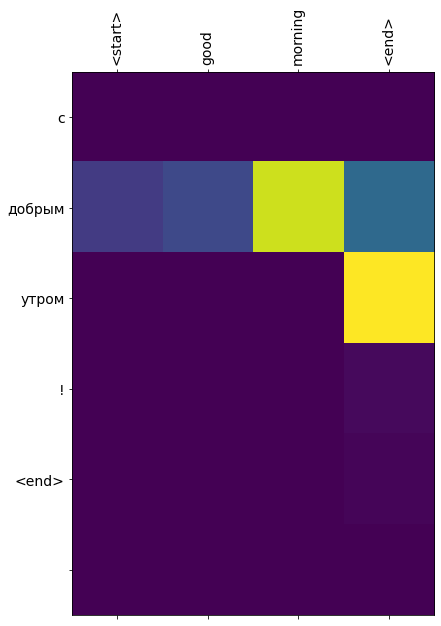

In [104]:
translate(u'good morning')

In [105]:
for seq_index in range(0, 20000, 500):
    string_i = input_texts[seq_index]
    translate(string_i[7:-5].lower(), False)

Input: <start> go . <end>
Predicted translation: идите . <end> 

Input: <start> have fun . <end>
Predicted translation: наслаждайтесь . <end> 

Input: <start> he smiled . <end>
Predicted translation: он улыбнулся . <end> 

Input: <start> let us in . <end>
Predicted translation: впустите нас . <end> 

Input: <start> eat slowly . <end>
Predicted translation: ешьте не спеша . <end> 

Input: <start> i m stable . <end>
Predicted translation: я твердая . <end> 

Input: <start> tom s well . <end>
Predicted translation: том в порядке . <end> 

Input: <start> he chuckled . <end>
Predicted translation: он хихикал . <end> 

Input: <start> i was naive . <end>
Predicted translation: я был наивен . <end> 

Input: <start> just say no . <end>
Predicted translation: просто откажитесь . <end> 

Input: <start> tom left me . <end>
Predicted translation: том меня бросил . <end> 

Input: <start> you re safe . <end>
Predicted translation: ты в безопасности . <end> 

Input: <start> he is chubby . <end>
Predic